## Look at champion.gg data historically, using their github repo for data

In [1]:
import pandas
from IPython.core.display import display, HTML
idx = pandas.IndexSlice

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns;
sns.set_palette('deep')

import matplotlib
matplotlib.rcParams['animation.writer'] = 'avconv'
import matplotlib.animation

In [2]:
panel = pandas.read_pickle('championgg-data/alldata.pickle')
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 33 (items) x 242 (major_axis) x 18 (minor_axis)
Items axis: 5.10 to 6.18
Major_axis axis: (Aatrox, Jungle) to (Zyra, Support)
Minor_axis axis: winPercent to overallPositionChange

## Mean values over patches

In [3]:
means = panel.mean().transpose()
means

winPercent  playPercent   banRate  experience     kills    deaths  \
5.10   49.961587     4.987513  4.629259   68.630794  6.282593  6.121376   
5.11   50.148936     5.004415  4.986011   70.414894  6.190319  6.035851   
5.12   50.023172     5.065968  5.044892   68.761075  6.181989  5.974892   
5.13   49.744842     4.959684  5.254316   68.244842  5.991684  5.908316   
5.14   49.929519     5.021176  4.673316   70.963048  5.948128  5.916578   
5.15   49.751123     5.024385  4.542781   71.477701  5.948182  5.923262   
5.16   49.754840     4.978191  4.562074   71.246277  6.031862  6.021277   
5.17   49.952447     4.980053  4.150106   70.160904  6.057394  6.039787   
5.18   49.959144     4.991390  4.204118   72.353690  6.187433  6.158235   
5.19   49.913763     5.035645  4.323925   74.972097  6.147688  6.145538   
5.20   50.073789     4.928526  4.601737   73.695105  6.067000  6.048526   
5.21   50.080684     4.940895  4.702737   72.858158  6.071737  6.080526   
5.22   49.886071     4.688010  4.608265   70.271020  5.892806  5.901735   
5.23   49.920102     4.707665  4.926091   70.046193  5.992284  5.973452   
5.24   50.067839     4.665126  5.195829   72.513266  6.067638  6.138844   
6.01   49.805354     4.682273  5.084798   73.810303  6.093081  6.219091   
6.02   49.499400     4.721950  0.000000   56.155800  5.757300  5.847150   
6.03   49.352386     4.768122  0.000000   44.323706  5.710406  5.801624   
6.04   49.468827     4.795357  0.000000   48.447806  5.649694  5.682602   
6.05   49.649323     4.880104  4.331406   49.388021  5.764844  5.780104   
6.06   49.726497     4.773147  4.585838   46.059645  5.835584  5.822030   
6.07   49.721040     4.646535  4.693020   56.345644  5.753020  5.781881   
6.08   49.887665     4.729086  4.538376   59.179391  5.657614  5.611371   
6.09   49.973618     4.671457  4.884271   61.197990  5.920754  5.880854   
6.10   49.859261     4.590246  5.290788   63.019754  5.981330  5.983399   
6.11   49.892315     4.613990  5.023103   63.944138  6.080640  6.049458   
6.12   49.933627     4.584216  4.844804   70.828186  6.009657  6.011520   
6.13   49.903000     4.698700  4.531900   69.611900  6.197050  6.132050   
6.14   50.093682     4.682886  4.390597   66.333284  6.189154  6.094726   
6.15   49.884450     4.710550  4.284250   69.349500  6.189200  6.132450   
6.16   49.839208     4.666881  4.401584   72.667624  6.226287  6.178119   
6.17   49.905226     4.739799  4.281407   65.080503  6.238040  6.193618   
6.18   49.999749     4.737739  4.188141   65.084422  6.288291  6.252462   

       assists       KDA  largestKillingSpree  totalDamageDealtToChampions  \
5.10  9.171005  2.562896             2.866772                 20875.084656   
5.11  9.085372  2.572097             2.844468                 20670.148936   
5.12  8.840376  2.554110             2.855806                 20391.618280   
5.13  8.747263  2.530527             2.774368                 19703.257895   
5.14  8.844064  2.536590             2.746578                 19427.711230   
5.15  8.818930  2.529990             2.745294                 19234.197861   
5.16  9.072872  2.548748             2.767819                 19765.526596   
5.17  9.195319  2.561447             2.778617                 19812.111702   
5.18  9.280160  2.546475             2.812353                 20021.754011   
5.19  9.306290  2.550348             2.803065                 20055.306452   
5.20  9.127789  2.547150             2.784684                 19867.847368   
5.21  9.145368  2.537589             2.782842                 20014.094737   
5.22  8.206122  2.434008             2.758418                 18404.933673   
5.23  8.281168  2.431743             2.788579                 18847.065990   
5.24  8.509950  2.413282             2.782915                 18881.904523   
6.01  8.549091  2.389985             2.782727                 19252.272727   
6.02  8.296500  2.441301             2.711350                 18865.715000   
6.03  8.256853  2.447580             2.697107      

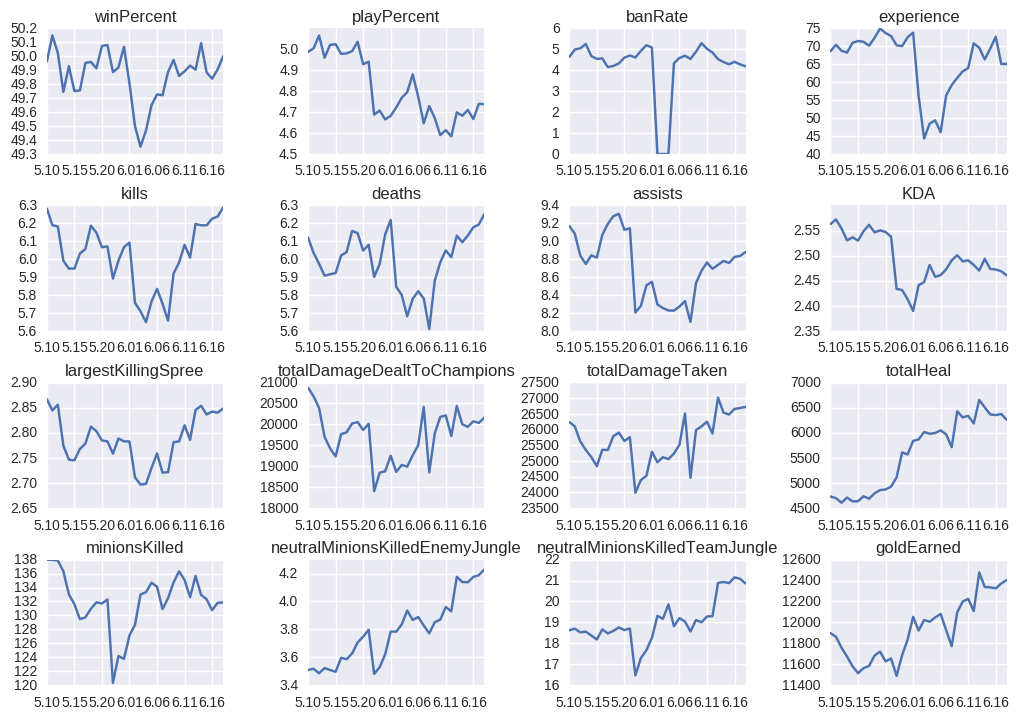

In [4]:
fig, axs = plt.subplots(figsize=(10,7), ncols=4, nrows=4)
for i, c in enumerate(panel['6.17'].columns[:16]):
    row, col = int(i/4), i%4
    g = means[c].plot(ax=axs[row, col])
    g.set(title=c)
fig.tight_layout(pad=0, h_pad=0.5)

Text dump; time series of play percent for every champion

In [5]:
df = panel.xs('playPercent', axis=2)
df.sortlevel(inplace=True)
report = df.loc[idx[:,['Support']], :].transpose()
report.sortlevel(level=1)

Champion Alistar   Annie    Bard Blitzcrank   Brand   Braum Fiddlesticks  \
Role     Support Support Support    Support Support Support      Support   
5.10       11.79    5.28    7.09      11.73    0.73    8.26          NaN   
5.11       13.26    5.17    8.11      12.28    0.76    7.68          NaN   
5.12       14.09    5.35    7.99      12.62    0.81    9.92          NaN   
5.13       13.10    4.37    5.51      13.22    0.95    9.48         0.30   
5.14       13.16    4.30    4.63      14.61    1.09   10.47         0.30   
5.15       12.14    4.16    4.11      16.07    1.21   11.47         0.28   
5.16       11.55    3.99    3.88      17.77    1.12   14.68         0.27   
5.17       10.38    3.82    4.65      17.51    1.31   18.19         0.31   
5.18        9.69    3.73    5.05      18.55    1.54   16.67         0.30   
5.19       10.27    4.11    4.61      17.45    2.20   18.27         0.30   
5.20       10.46    3.90    4.28      16.28    2.81   16.43         0.25   
5.21       12.56    3.58    4.13      16.94    3.13   14.55         0.26   
5.22        9.44    3.30    4.29      16.34    5.22   11.85         0.32   
5.23        8.92    2.96    6.39      16.76    9.46   11.02         0.30   
5.24        8.23    2.89   10.78      16.67    9.50   10.39         0.28   
6.01       11.29    2.36    9.40      14.93    6.59   10.63         0.38   
6.02       15.52    1.80    8.39      14.02    3.67   13.43          NaN   
6.03       17.57    1.68    7.94      13.80    2.61   14.34          NaN   
6.04       18.29    1.59    8.66      13.20    2.20   15.80          NaN   
6.05       17.28    1.55   10.35      13.05    2.06   16.51          NaN   
6.06       14.60    1.68    9.74      13.18    1.95   17.55          NaN   
6.07       16.45    1.65    9.97      15.35    1.79   16.89         0.21   
6.08       17.13    1.34    8.77      15.07    1.68   15.70         0.27   
6.09       19.16    2.23    8.43      16.10    4.07   15.44          NaN   
6.10       16.51    1.60    9.74      16.79    2.91   17.30          NaN   
6.11       13.45    1.38   11.62      17.11    2.37   17.00          NaN   
6.12       12.03    1.36   10.94      17.42    2.23   15.75          NaN   
6.13        7.98    1.31   10.11      13.60    2.58   14.28          NaN   
6.14        8.24    1.15    9.36      12.54    2.52   13.85          NaN   
6.15        8.46    1.18   10.06      12.05    2.68   12.76          NaN   
6.16        7.38    1.30    9.61      11.38    2.88   12.93          NaN   
6.17        7.39    1.25   10.84      11.46    3.09   14.14          NaN   
6.18        7.01    1.24   11.22      11.26    3.34   14.21          NaN   

Champion   Galio   Janna   Karma   ...    Soraka Tahm Kench Taliyah   Taric  \
Role     Support Support Support   ...   Support    Support Support Support   
5.10        0.11   20.46    3.22   ...      4.46        NaN     NaN    1.86   
5.11        0.13   20.03    2.59   ...      4.76        NaN     NaN    1.81   
5.12         NaN   20.25    2.33   ...      5.01        NaN     NaN    1.72   
5.13         NaN   20.91    1.88   ...      5.57      10.16     NaN    1.43   
5.14        0.17   23.53    2.31   ...      5.87       5.56     NaN    1.46   
5.15        0.18   23.69    2.02   ...      6.92       3.69     NaN    1.44   
5.16        0.15   21.35    1.74   ...      6.93       3.21     NaN    1.36   
5.17        0.12   18.85    1.95   ...      8.90       3.30     NaN    1.31   
5.18        0.15   16.25    1.83   ...      9.46       3.63     NaN    1.18   
5.19         NaN   15.28    1.87   ...      9.91       4.55     NaN    1.28   
5.20        0.13   14.41    1.60   ...      8.82       9.25     NaN    1.24   
5.21        0.13   13.93    1.66   ...      8.73       8.34     NaN    1.27   
5.22        0.15   15.32    2.36   ...     16.05       7.54     NaN    2.43   
5.23        0.13   14.26    2.33   ...     12.45       6.98     NaN    2.61   
5.24        0.14   14.22    2.39   ...      8.49       4.55     NaN    1.96

In [6]:
def makePlot(c, limits=None):
    df = panel.xs(c, axis=2)

    fig = plt.figure()

    def animate(i):
        plt.clf()
        if i >= len(panel):
            i = len(panel) - 1
        df = panel.ix[i]
        df['role'] = df.index.get_level_values(level=1)
        plt.clf()
        g = sns.violinplot(y=c, x='role', data=df, inner='stick')
        g.set(title="%s for Patch %s" % (c, panel.items[i]), xlabel="", ylabel="")
        if limits:
            g.axes.set_ylim(limits[0], limits[1])
        return g
    return matplotlib.animation.FuncAnimation(fig, animate, frames=len(panel)+5, interval=250)

Inline a plot. Has a bug here; displayed twice. Maybe because no init function?

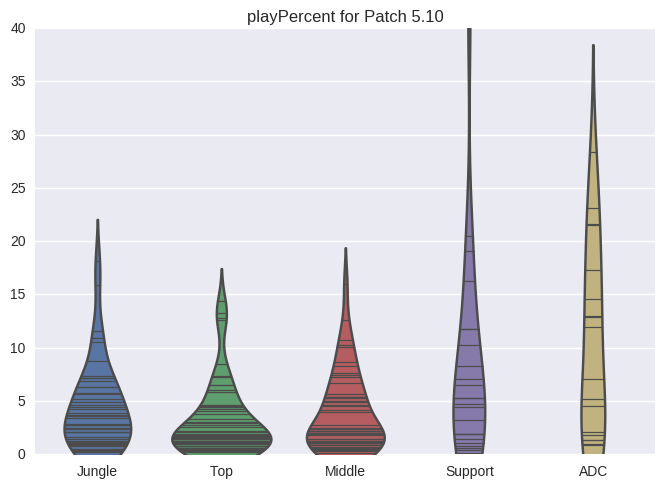

In [7]:
HTML(makePlot('playPercent', (0, 40)).to_html5_video())

Generate a lot of plots to local disk

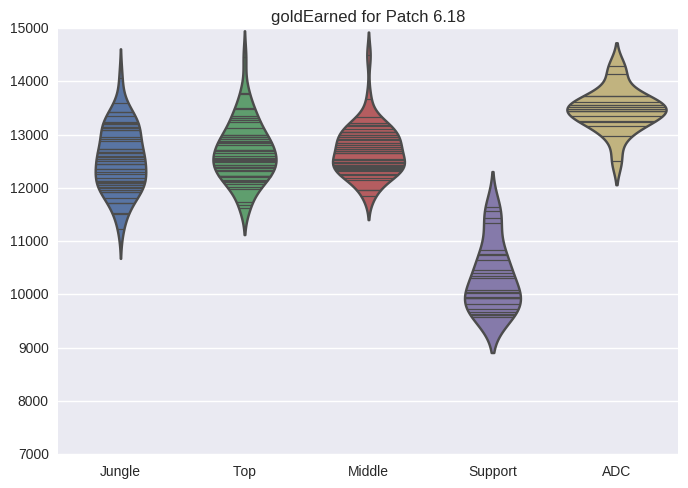

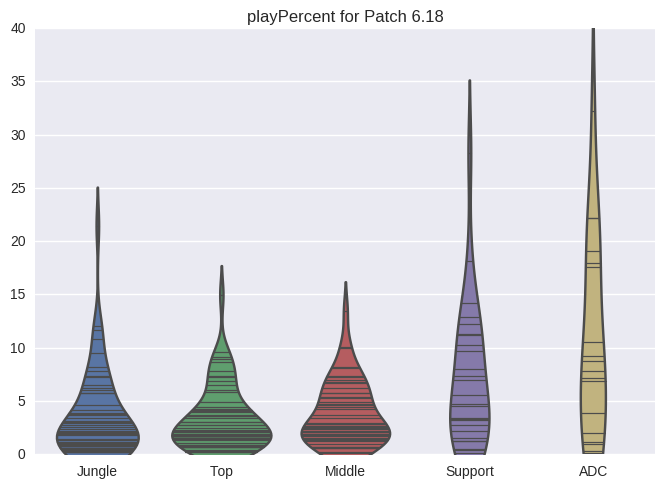

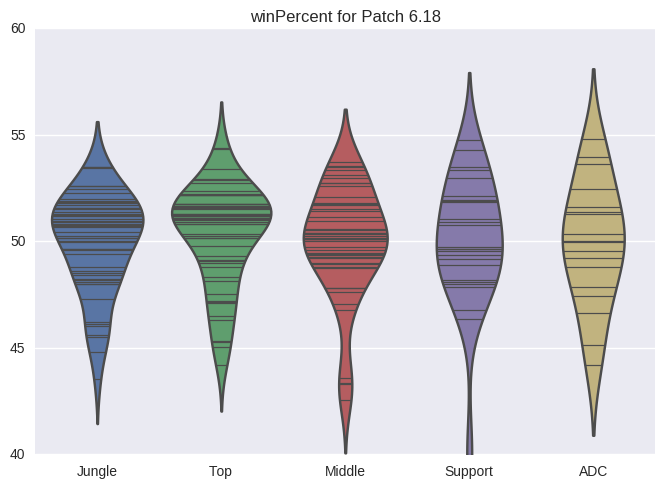

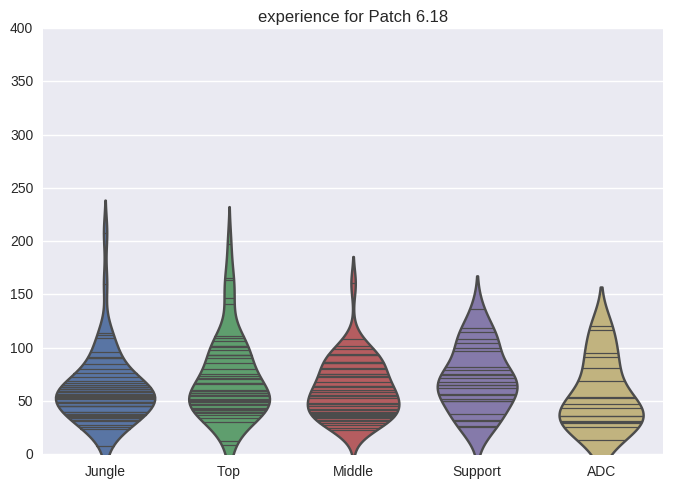

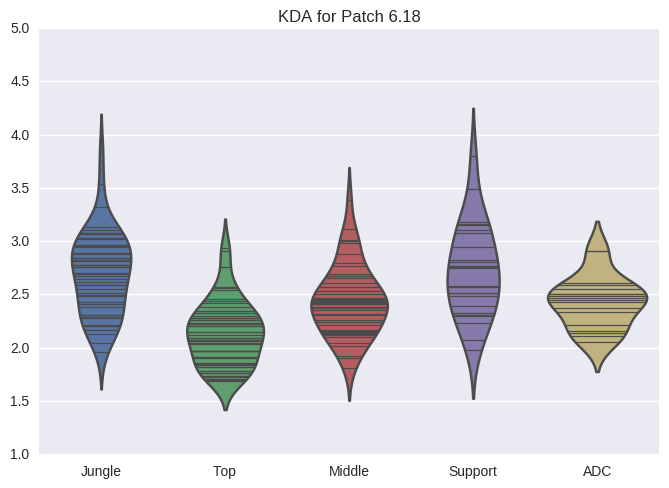

In [8]:
for c, a, b in (('goldEarned', 7000, 15000),
                ('playPercent', 0, 40),
                ('winPercent', 40, 60),
                ('experience', 0, 400),
                ('KDA', 1, 5)):
    makePlot(c, (a, b)).save('%s.mp4' % c)